# Poetry generation challenge

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [41]:
##import the required libraries and APIs
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Step 1: Create a corpus

In [7]:
# downlaod the data from the url
!wget --no-check-certificate \
https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
-o /tmp/sonnets.txt

In [42]:
##printing the text
shakespeare_text = open('/content/sonnets.txt').read()
print(len(shakespeare_text))

28893


In [43]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split('\n')
print(corpus)

['i', '', ' from fairest creatures we desire increase,', " that thereby beauty's rose might never die,", ' but as the riper should by time decease,', ' his tender heir might bear his memory:', ' but thou, contracted to thine own bright eyes,', " feed'st thy light's flame with self-substantial fuel,", ' making a famine where abundance lies,', ' thy self thy foe, to thy sweet self too cruel:', " thou that art now the world's fresh ornament,", ' and only herald to the gaudy spring,', ' within thine own bud buriest thy content,', " and tender churl mak'st waste in niggarding:", '   pity the world, or else this glutton be,', "   to eat the world's due, by the grave and thee.", '', ' ii', '', ' when forty winters shall besiege thy brow,', " and dig deep trenches in thy beauty's field,", " thy youth's proud livery so gazed on now,", " will be a tatter'd weed of small worth held:", ' then being asked, where all thy beauty lies,', ' where all the treasure of thy lusty days;', ' to say, within t

## Set up the tokenizer

In [44]:
# set up tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - be mindful of the <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [47]:
##create sequences of n_gram_sequences
input_sequences = []

for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  #n_grame_sequences creation
  for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)

In [48]:
# pad the sequences
max_seq_len = max([len(line) for line in input_sequences])

input_sequence_array = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')
input_sequence_array = np.array(input_sequence_array)

In [49]:
# create features(X) and label(y)

X = input_sequence_array[:, :-1]
labels = input_sequence_array[:, -1]

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

embedding_dim = 120

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_len-1)) # excluding last label one
# model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(vocab_size, activation='softmax'))

adam = Adam(lr = 0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 120)           185280    
                                                                 
 bidirectional_8 (Bidirectio  (None, 240)              231360    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1544)              372104    
                                                                 
Total params: 788,744
Trainable params: 788,744
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
num_epochs = 200

history = model.fit(X, y, epochs=num_epochs)

Epoch 1/200
142/142 [==============================] - 4s 7ms/step - loss: 6.6844 - accuracy: 0.0219
Epoch 2/200
142/142 [==============================] - 1s 7ms/step - loss: 5.9951 - accuracy: 0.0535
Epoch 3/200
142/142 [==============================] - 1s 7ms/step - loss: 5.1024 - accuracy: 0.0924
Epoch 4/200
142/142 [==============================] - 1s 7ms/step - loss: 3.8456 - accuracy: 0.2011
Epoch 5/200
142/142 [==============================] - 1s 7ms/step - loss: 2.6028 - accuracy: 0.4085
Epoch 6/200
142/142 [==============================] - 1s 7ms/step - loss: 1.6393 - accuracy: 0.6173
Epoch 7/200
142/142 [==============================] - 1s 7ms/step - loss: 1.0514 - accuracy: 0.7662
Epoch 8/200
142/142 [==============================] - 1s 7ms/step - loss: 0.7242 - accuracy: 0.8369
Epoch 9/200
142/142 [==============================] - 1s 7ms/step - loss: 0.5855 - accuracy: 0.8646
Epoch 10/200
142/142 [==============================] - 1s 7ms/step - loss: 0.5053 - accura

## Visualise the metrics

In [57]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

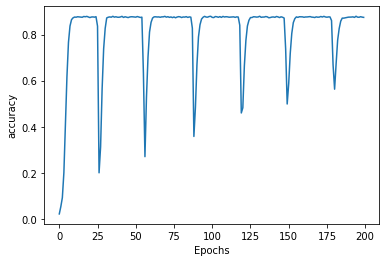

In [58]:
plot_metric(history, 'accuracy')

## Generate new text

In [66]:
seed_text = 'It was a rainy night but hot.'
num_next_words = 100

for _ in range(num_next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

  probabilities = model.predict(token_list)
  # predicted = np.argmax(probabilities, axis=-1)[0]

  # instead of fixed index 0, get the random choice
  choice = np.random.choice([1,2,3])
  predicted = np.argsort(probabilities)[0][-choice]

  if predicted !=0:
    output_word = tokenizer.index_word[predicted]
    seed_text += ' ' + output_word

print(seed_text)

It was a rainy night but hot. one more day excuse ye know she couplement thine summer's hot wert it done toil'd not remove him from thee buriest hope gain hence hence remain gate forth date gone are gone call done waste friend love' found done me thine annoy me see his grow'st me one forth issue thee this cunning want her thought lets lofty forth done one date see see them me i see thee such friend one respect do wail thee all my more nearly survey sourly hence thee forth love call you 'gainst done mind the love's love' sell remembrance thee thee hence me
